# Covariance and Principal component analysis

In [1]:
# import packages, data, & set figure sizes
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

dataMurder = np.loadtxt('murderdata2d.txt')

dataOccu = np.loadtxt('occupancy_data.csv', delimiter=',')
dataOccu = dataOccu[:,:-1]

# read in the data
dataTrain = np.loadtxt('IDSWeedCropTrain.csv', delimiter=',')
dataTest = np.loadtxt('IDSWeedCropTest.csv', delimiter=',')

# split input variable & labels
XTrain = dataTrain[:,:-1]
YTrain = dataTrain[:,-1]
XTest = dataTest[:,:-1]
YTest = dataTest[:,-1]

## Exercise 1

## a) Implement PCA

In [2]:
# input: datamatrix
# output:  1) the eigenvalues in a vector (numpy array) in descending order
#          2) the unit eigenvectors in a matrix (numpy array) with each column 
#             being an eigenvector (in the same order as its associated eigenvalue)
#          3) (added) mean of original data (used for later computing)

def pca(data):
    # subtract off the mean for each dimension
    data_mean = data - np.mean(data, 0)
    
    # transpose data & calculate covariance matrix
    data_covar = np.cov(data_mean.T)
    
    # eigenvalues and eigenvectors
    data_eigenval, data_eigenvec = np.linalg.eigh(data_covar)
    
    # reverse with same indexing
    idx = data_eigenval.argsort()[::-1]   
    data_eigenval = data_eigenval[idx]
    data_eigenvec = data_eigenvec[:,idx]
        
    return data_eigenval, data_eigenvec, np.mean(data, axis=0)

In [3]:
# compute how many components are needed to capture 
# the input percentage (perc) on input eigenvalues (pca_data)
def compute_percentage(pca_data, perc):
    target_sum = pca_data.sum() * perc / 100
    num_pcs = 0
    current_sum = 0
    for i in range(len(pca_data)):
        current_sum += pca_data[i]
        if current_sum >= target_sum:
            return i+1

## b) Perform PCA on the murder dataset as discussed in the appendix of this document

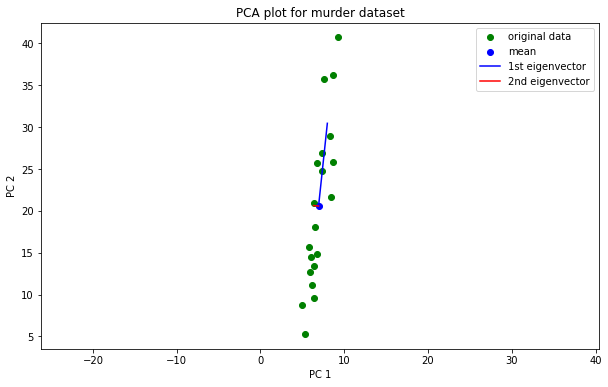

# of PCs to capture 90% of variance: 1
# of PCs to capture 95% of variance: 1


In [4]:
# perform pca & calculate squareroots
variance, components, mean = pca(dataMurder)
s0 = np.sqrt(variance[0])
s1 = np.sqrt(variance[1])

# draw scatter plot
plt.scatter(dataMurder[:, 0], dataMurder[:, 1], color='g', label='original data');
plt.axis('equal')
plt.scatter(mean[0], mean[1], color='b', label='mean');
plt.plot([mean[0], s0*components[0,0]+mean[0]], [mean[1], s0*components[1,0]+mean[1]], color='b', label='1st eigenvector')
plt.plot([mean[0], s1*components[0,1]+mean[0]], [mean[1], s1*components[1,1]+mean[1]], color='r', label='2nd eigenvector')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA plot for murder dataset')
plt.legend()
plt.show()

print(f'# of PCs to capture 90% of variance: {compute_percentage(variance, 90)}\n\
# of PCs to capture 95% of variance: {compute_percentage(variance, 95)}')

## c) Perform PCA on IDSWeedCropTrain.csv

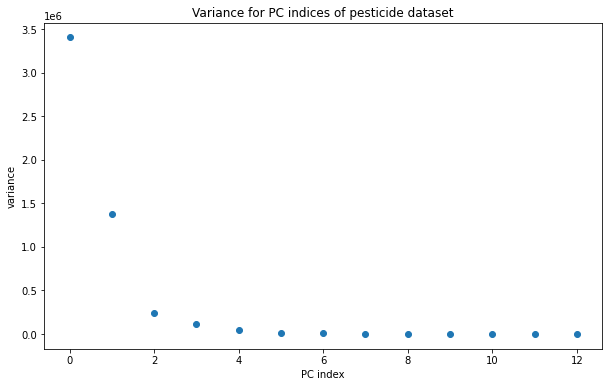

# of PCs to capture 90% of variance: 2
# of PCs to capture 95% of variance: 3


In [5]:
variance, components, mean = pca(XTrain)
plt.scatter(np.arange(0, len(variance), 1), variance);
plt.ylabel('variance');
plt.xlabel('PC index');
plt.title('Variance for PC indices of pesticide dataset');
plt.show()

print(f'# of PCs to capture 90% of variance: {compute_percentage(variance, 90)}\n\
# of PCs to capture 95% of variance: {compute_percentage(variance, 95)}')

## d) Perform PCA on the Occupancy dataset occupancy_data.csv

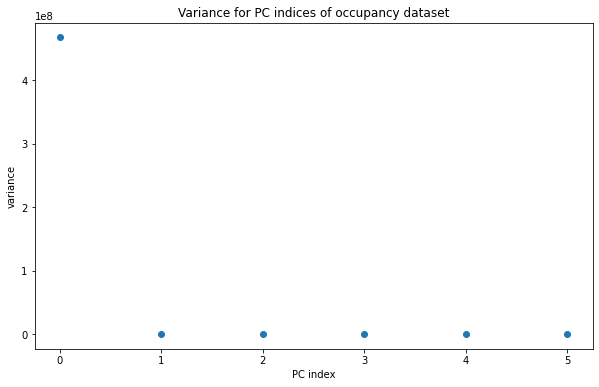

# of PCs to capture 90% of variance: 1
# of PCs to capture 95% of variance: 1


In [6]:
variance, components, mean = pca(dataOccu)
plt.scatter(np.arange(0, len(variance), 1), variance);
plt.ylabel('variance');
plt.xlabel('PC index');
plt.title('Variance for PC indices of occupancy dataset');
plt.show()

print(f'# of PCs to capture 90% of variance: {compute_percentage(variance, 90)}\n\
# of PCs to capture 95% of variance: {compute_percentage(variance, 95)}')

## e) Perform PCA on standardised Occupancy dataset occupancy_data.csv 
You can determine the cumulative normalized variance by normalizing the variance along all PCs
such that the sum of all variances is 1, and then capture how large a proportion of the variance
is described by the first, second, etc PC. Plot the cumulative variance versus the number of used
PCs. How many PCs (dimensions) do you need to capture 90% of the variance in your dataset?
95%?

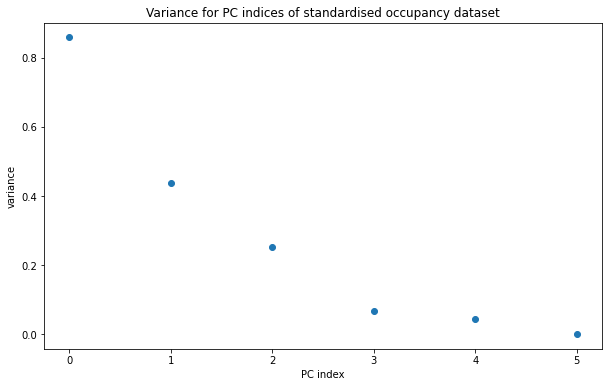

# of PCs to capture 90% of variance: 3
# of PCs to capture 95% of variance: 4


In [7]:
def standardise(data):
    stddev = np.std(data, axis=0)
    stddev.shape = (1, -1)
    norm_data = data / stddev
    return norm_data

variance, components, mean = pca(standardise(dataOccu))
# normalize variance
norm1 = variance / np.linalg.norm(variance)
plt.scatter(np.arange(0, len(variance), 1), norm1);
plt.ylabel('variance');
plt.xlabel('PC index');
plt.title('Variance for PC indices of standardised occupancy dataset');
plt.show()

print(f'# of PCs to capture 90% of variance: {compute_percentage(variance, 90)}\n\
# of PCs to capture 95% of variance: {compute_percentage(variance, 95)}')

## Exercise 2

In [8]:
# input:   1) datamatrix as loaded by numpy.loadtxt('dataset.txt')
#	       2) an integer d specifying the number of dimensions for the output (most commonly used are 2 or 3)

# output:  1) an N x d numpy array containing the d coordinates of the N original datapoints projected onto 
#          the top d PCs

def mds(data, d):
    variance, components, mean = pca(data)
    components = components[:d]
    
    matrix = np.dot(data, components.T)    
    return matrix

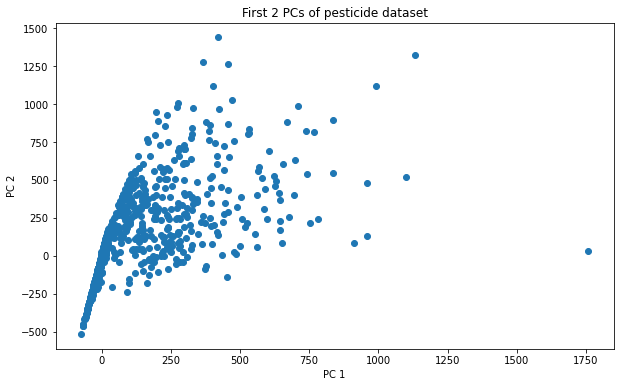

In [9]:
matrix = mds(XTrain, 2)
plt.scatter(matrix[:,0], matrix[:,1]);
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('First 2 PCs of pesticide dataset')
plt.show();

b) Use/modify you function (or the scikit-lean code) to project the Building occupancy dataset
of the first 2 principal components using the unnormalised data and the normalised one (two
different plots).

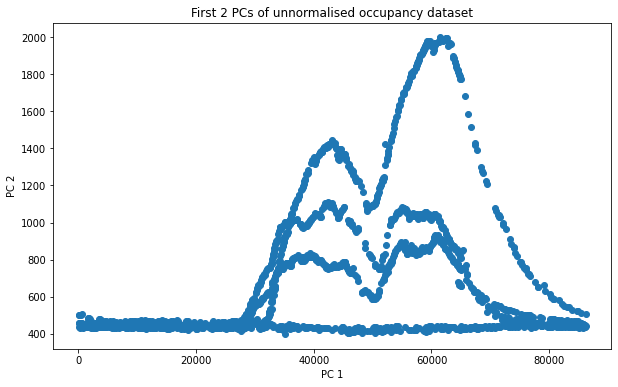

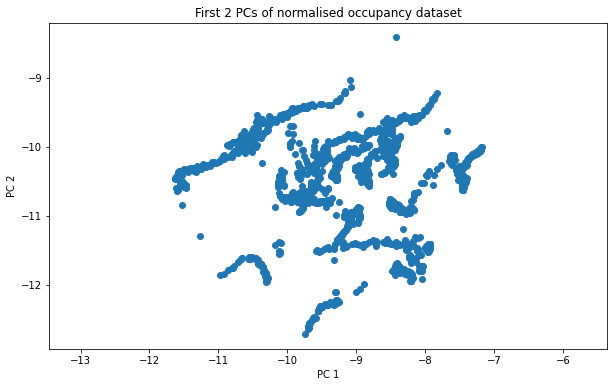

In [10]:
m1 = mds(dataOccu, 2)
plt.scatter(m1[:,0], m1[:,1]);
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('First 2 PCs of unnormalised occupancy dataset')
#plt.axis('equal')
plt.show()

m2 = mds(standardise(dataOccu), 2)
plt.scatter(m2[:,0], m2[:,1]);
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('First 2 PCs of normalised occupancy dataset')
plt.axis('equal')
plt.show()

c) Virtual Chocolate Box question (i.e., really only for fun, no point). Only if you are
familiar with Matplotlib3D or want to play with it. Still using the Building occupancy data set,
modify your function to project your data on its first 3 principal components. Display it. Redo
it with the standardised data. With Matplotlib3D, you can rotate your plot so as to see data
from different viewing angles. Try and comment.

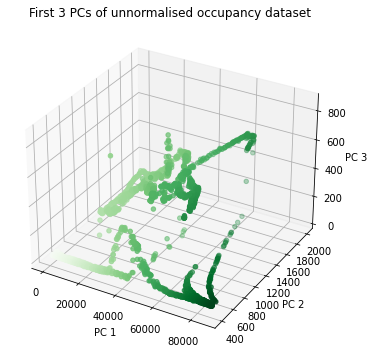

In [13]:
ax1 = plt.axes(projection='3d')
m3 = mds(dataOccu, 3)
ax1.scatter3D(m3[:,0], m3[:,1], m3[:,2], c=m3[:,0], cmap='Greens');
ax1.set_xlabel('PC 1');
ax1.set_ylabel('PC 2');
ax1.set_zlabel('PC 3');
ax1.set_title('First 3 PCs of unnormalised occupancy dataset');

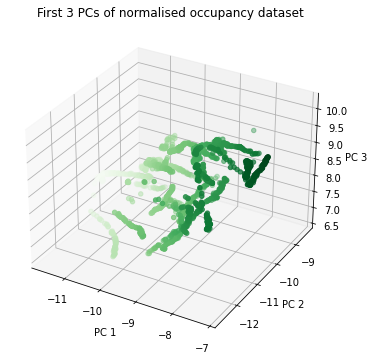

In [15]:
ax2 = plt.axes(projection='3d')
m4 = mds(standardise(dataOccu), 3)
ax2.scatter3D(m4[:,0], m4[:,1], m4[:,2], c=m4[:,0], cmap='Greens');
ax2.set_xlabel('PC 1');
ax2.set_ylabel('PC 2');
ax2.set_zlabel('PC 3');
ax2.set_title('First 3 PCs of normalised occupancy dataset');

# Clustering I

In this exercise, you are supposed to do clustering using the k-means algorithm as introduced in the
lecture. You are encouraged to implement the algorithm on your own. However, you can also use
scikit-learn:

# Exercise 3 (Clustering, 25 points). 
Perform 2-means clustering of the input data in IDSWeedCropTrain.csv.
For the submission, initialize the cluster centers with the first two data points in IDSWeedCropTrain.csv
(that is not a recommended initialization technique, but makes it easier to correct the exam).
Deliverables. Description of software used; two cluster centers

cluster centers:
[[5.68220339e+00 4.93389831e+01 7.90923729e+02 3.84509110e+03
  3.38647246e+03 1.36161229e+03 2.94523305e+02 1.31936441e+02
  7.07457627e+01 3.95805085e+01 1.94152542e+01 4.22669492e+00
  4.40677966e-01]
 [2.19507576e+00 1.37007576e+01 1.70367424e+02 1.39206250e+03
  3.18763636e+03 2.62546970e+03 1.00435985e+03 6.33471591e+02
  4.96619318e+02 2.95941288e+02 1.46073864e+02 2.92537879e+01
  2.84280303e+00]]


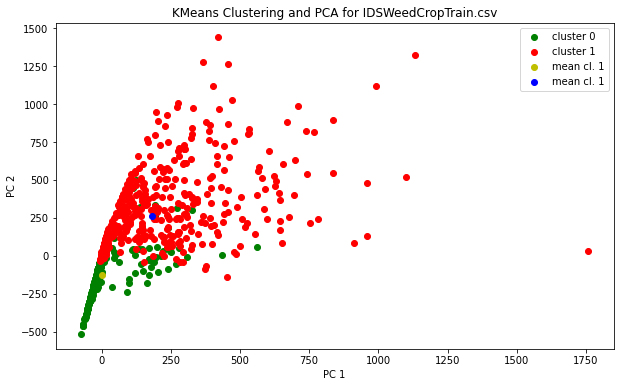

In [16]:
from sklearn.cluster import KMeans

startingPoint = np.vstack((XTrain[0,], XTrain[1,]))
kmeans = KMeans (n_clusters=2, random_state=42, algorithm='full', n_init=1, init=startingPoint)
kmeans.fit(XTrain)
clusters = kmeans.labels_
print(f'cluster centers:\n{kmeans.cluster_centers_}')

pca = mds(XTrain, 2)
x = pca[:,0]
y = pca[:,1]

idx0 = np.where(clusters==0)
idx1 = np.where(clusters==1)
plt.scatter(x[idx0], y[idx0], color='g', label='cluster 0');
plt.scatter(x[idx1], y[idx1], color='r', label='cluster 1');
plt.scatter(np.mean(x[idx0]), np.mean(y[idx0]), color='y', label='mean cl. 1');
plt.scatter(np.mean(x[idx1]), np.mean(y[idx1]), color='b', label='mean cl. 1');
plt.legend();
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('KMeans Clustering and PCA for IDSWeedCropTrain.csv');